In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_root = ('/content/drive/MyDrive/wastetrail1')

In [ ]:
IMAGE_SHAPE = (224, 224)

In [ ]:
TRAINING_DATA_DIR = str(data_root)

In [ ]:
datagen_kwargs = dict(rescale=1./255, validation_split=.20)

In [ ]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset = "validation",
shuffle=True,
target_size=IMAGE_SHAPE
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="training",
shuffle=True,
target_size=IMAGE_SHAPE)

Found 6361 images belonging to 3 classes.
Found 25446 images belonging to 3 classes.


In [ ]:
print (train_generator.class_indices)

{'bios': 0, 'ewastes': 1, 'nonbios': 2}


In [ ]:
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
                    output_shape=[1280],
                    trainable=False),
    tf.keras.layers.Dropout(0.5),  # Increased dropout rate
    tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),  # L2 regularization with lambda=0.001
    tf.keras.layers.Dense(3, activation='softmax', kernel_regularizer=keras.regularizers.l2(0.001))  # L2 regularization with lambda=0.001
])
model.build([None, 224, 224, 3])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              1311744   
                                                                 
 dense_3 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 3572803 (13.63 MB)
Trainable params: 1314819 (5.02 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(
 train_generator,
 epochs=10,
 verbose=1,
 steps_per_epoch=steps_per_epoch,
 validation_data=valid_generator,
 validation_steps=val_steps_per_epoch,callbacks=[early_stopping]).history

Epoch 1/10
796/796 [==============================] - ETA: 0s - loss: 0.8276 - accuracy: 0.9057

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


796/796 [==============================] - 4711s 6s/step - loss: 0.8276 - accuracy: 0.9057 - val_loss: 0.4882 - val_accuracy: 0.9126
Epoch 2/10
796/796 [==============================] - 1153s 1s/step - loss: 0.3965 - accuracy: 0.9317 - val_loss: 0.3403 - val_accuracy: 0.9351
Epoch 3/10
796/796 [==============================] - 1149s 1s/step - loss: 0.3305 - accuracy: 0.9374 - val_loss: 0.3653 - val_accuracy: 0.9123
Epoch 4/10
796/796 [==============================] - 1174s 1s/step - loss: 0.2933 - accuracy: 0.9423 - val_loss: 0.3093 - val_accuracy: 0.9286
Epoch 5/10
796/796 [==============================] - 1113s 1s/step - loss: 0.2675 - accuracy: 0.9462 - val_loss: 0.3460 - val_accuracy: 0.9065
Epoch 6/10
796/796 [==============================] - 1122s 1s/step - loss: 0.2527 - accuracy: 0.9481 - val_loss: 0.3357 - val_accuracy: 0.9069
Epoch 7/10
796/796 [==============================] - 1157s 1s/step - loss: 0.2386 - accuracy: 0.9513 - val_loss: 0.3039 - val_accuracy: 0.9241
Epo

In [ ]:
final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

199/199 [==============================] - 224s 1s/step - loss: 0.3085 - accuracy: 0.9179
Final loss: 0.31
Final accuracy: 91.79%


In [ ]:
print(hist)

{'loss': [0.8276188969612122, 0.39651235938072205, 0.3305078446865082, 0.293335884809494, 0.2675117552280426, 0.252747505903244, 0.2385748028755188, 0.2271425426006317, 0.22113433480262756, 0.21486060321331024], 'accuracy': [0.9056826233863831, 0.9316592216491699, 0.9374361634254456, 0.9422699213027954, 0.9462391138076782, 0.948125422000885, 0.9512693285942078, 0.9536665678024292, 0.9542560577392578, 0.9551599621772766], 'val_loss': [0.48820871114730835, 0.34025493264198303, 0.3652859628200531, 0.30931949615478516, 0.3459521532058716, 0.3356861472129822, 0.30387356877326965, 0.290901780128479, 0.3589983284473419, 0.3085443377494812], 'val_accuracy': [0.912592351436615, 0.9350730776786804, 0.9122779369354248, 0.9286275506019592, 0.906461238861084, 0.9069328904151917, 0.9240685701370239, 0.9240685701370239, 0.9026882648468018, 0.9179374575614929]}


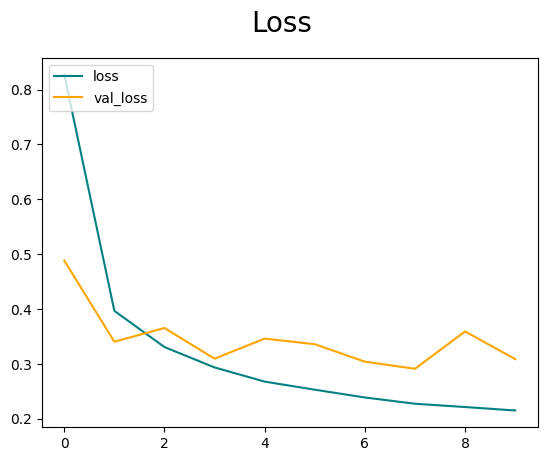

In [ ]:
fig = plt.figure()
plt.plot(hist["loss"], color="teal", label="loss")
plt.plot(hist["val_loss"], color="orange", label="val_loss")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper left")
plt.show()

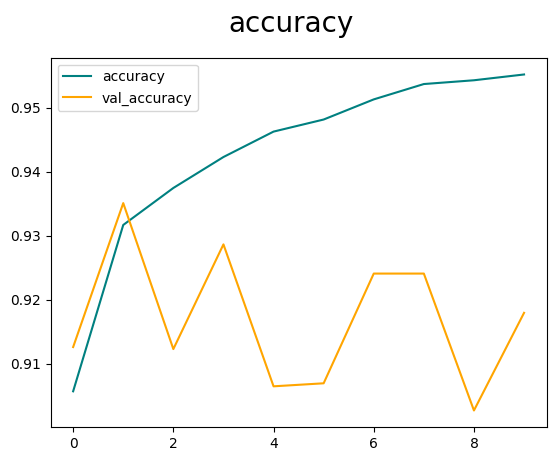

In [ ]:
fig = plt.figure()
plt.plot(hist["accuracy"], color="teal", label="accuracy")
plt.plot(hist["val_accuracy"], color="orange", label="val_accuracy")
fig.suptitle("accuracy", fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
model.save('WASTE_CLASSIFIER.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save the weights
model.save_weights('WASTECLASSIFIER_save_weights.h5')
